In [105]:
import numpy as np

# Load data from .npy files
X = np.load("../data/X_test.npy")  
Y = np.load("../data/Y_test.npy")

In [106]:
import tensorflow as tf
import joblib
from sklearn.preprocessing import MinMaxScaler

# Explicitly define 'mse' (Mean Squared Error)
custom_objects = {"mse": tf.keras.losses.MeanSquaredError()}

# Load the trained model with custom objects
model = tf.keras.models.load_model("../models/lstm_model.h5", custom_objects=custom_objects) 

In [107]:
# Define time step (e.g., use the past 50 timesteps to predict the next one)
time_steps = 50

# Create sequences
X_seq, Y_seq = [], []
for i in range(len(X) - time_steps):
    X_seq.append(X[i:i+time_steps])  # 50 time steps as input
    Y_seq.append(Y[i+time_steps])    # The next "Close" price as output

# Convert to NumPy arrays
X_seq, Y_seq = np.array(X_seq), np.array(Y_seq)
Y_seq = Y_seq.reshape(-1, 1)

print("Data reshaping for LSTM completed!")
print("X_seq shape:", X_seq.shape)  # Should be (samples, time_steps, features)
print("Y_seq shape:", Y_seq.shape)  # Should be (samples,)

Data reshaping for LSTM completed!
X_seq shape: (4951, 50, 5)
Y_seq shape: (4951, 1)


In [115]:
# Predict Close prices
test_predictions = model.predict(X_seq)

print("Predictions completed!")

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Predictions completed!


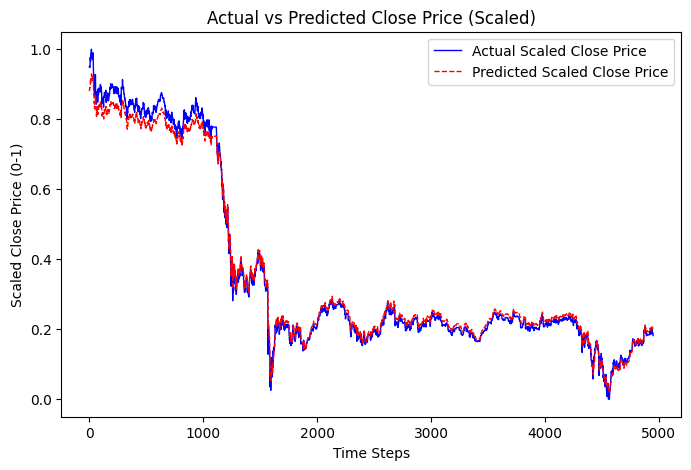

In [116]:
# plot the given Raw Y_test_seq values and Raw Model Predictions:

import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(8, 5))
plt.plot(Y_seq[:], label="Actual Scaled Close Price", color="blue", linewidth=1)
plt.plot(test_predictions[:], label="Predicted Scaled Close Price", color="red", linestyle="dashed", linewidth=1)
plt.xlabel("Time Steps")
plt.ylabel("Scaled Close Price (0-1)")
plt.legend()
plt.title("Actual vs Predicted Close Price (Scaled)")
plt.show()


In [117]:
# Inverse transform the predictions
# Extract only the Close column
test_predictions = scaler.inverse_transform(
    np.concatenate((np.zeros((len(test_predictions), 3)),  
                    test_predictions.reshape(-1, 1),
                    np.zeros((len(test_predictions), 1))), 
                   axis=1)  
)[:, 3]  

# Inverse transform actual prices
actual_prices = scaler.inverse_transform(
    np.concatenate((np.zeros((len(Y_seq), 3)),  
                    Y_seq.reshape(-1, 1),
                    np.zeros((len(Y_seq), 1))),  
                   axis=1)
)[:, 3]

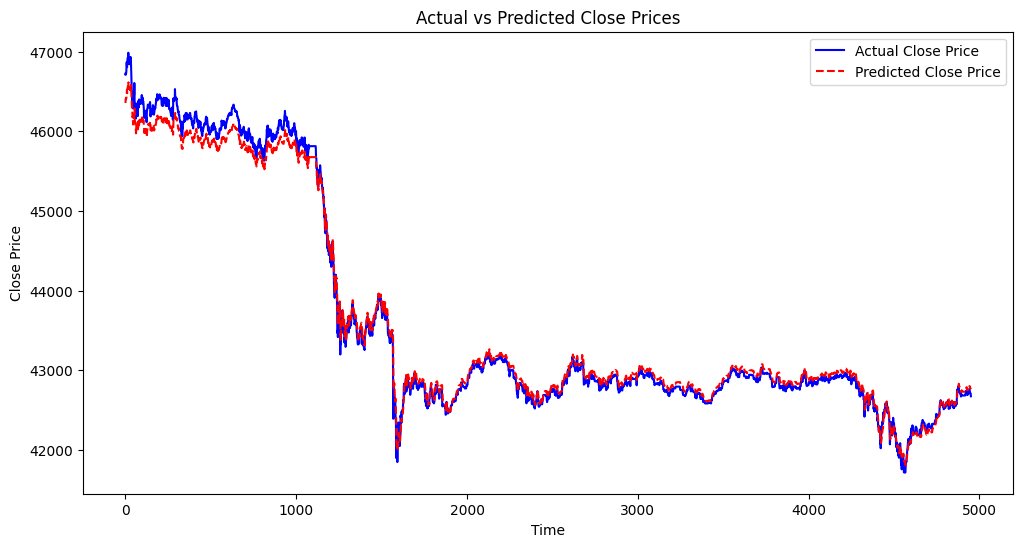

In [118]:
# plot the given Actual Close Price and Predicted Close Price:

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label="Actual Close Price", color="blue")
plt.plot(test_predictions, label="Predicted Close Price", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.title("Actual vs Predicted Close Prices")
plt.show()